# Importing Libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

# Reading the Data

In [52]:
df=pd.read_csv('kc.csv')

In [53]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
df=df.drop(['id','date'],axis=1)

We drop these two columns because they have no correlation  with the target variable

In [55]:
columns=df.columns

# Exploratory Data Analysis

In [56]:
a=df[columns].skew().sort_values()
a

lat              -0.485270
yr_built         -0.469805
zipcode           0.405661
bathrooms         0.511108
floors            0.616177
grade             0.771103
long              0.885053
condition         1.032805
sqft_living15     1.108181
sqft_above        1.446664
sqft_living       1.471555
sqft_basement     1.577965
bedrooms          1.974300
view              3.395750
price             4.024069
yr_renovated      4.549493
sqft_lot15        9.506743
waterfront       11.385108
sqft_lot         13.060019
dtype: float64

All the columns with the skew values greater than 0.95 have been modified to provide a normalised data to the model

In [57]:
a=a[a>0.95]
a

condition         1.032805
sqft_living15     1.108181
sqft_above        1.446664
sqft_living       1.471555
sqft_basement     1.577965
bedrooms          1.974300
view              3.395750
price             4.024069
yr_renovated      4.549493
sqft_lot15        9.506743
waterfront       11.385108
sqft_lot         13.060019
dtype: float64

In [58]:
b=a.index

In [59]:
df[b]=np.sqrt(df[b])

In [60]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,471.062629,1.732051,1.00,34.351128,75.166482,1.0,0.0,0.0,1.732051,7,34.351128,0.000000,1955,0.000000,98178,47.5112,-122.257,36.606010,75.166482
1,733.484833,1.732051,2.25,50.695167,85.099941,2.0,0.0,0.0,1.732051,7,46.583259,20.000000,1951,44.620623,98125,47.7210,-122.319,41.109610,87.401373
2,424.264069,1.414214,1.00,27.748874,100.000000,1.0,0.0,0.0,1.732051,6,27.748874,0.000000,1933,0.000000,98028,47.7379,-122.233,52.153619,89.788641
3,777.174369,2.000000,3.00,44.271887,70.710678,1.0,0.0,0.0,2.236068,7,32.403703,30.166206,1965,0.000000,98136,47.5208,-122.393,36.878178,70.710678
4,714.142843,1.732051,2.00,40.987803,89.888820,1.0,0.0,0.0,1.732051,8,40.987803,0.000000,1987,0.000000,98074,47.6168,-122.045,42.426407,86.619859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,600.000000,1.732051,2.50,39.115214,33.630343,3.0,0.0,0.0,1.732051,8,39.115214,0.000000,2009,0.000000,98103,47.6993,-122.346,39.115214,38.845849
21609,632.455532,2.000000,2.50,48.062459,76.243032,2.0,0.0,0.0,1.732051,8,48.062459,0.000000,2014,0.000000,98146,47.5107,-122.362,42.778499,84.852814
21610,634.114343,1.414214,0.75,31.937439,36.742346,2.0,0.0,0.0,1.732051,7,31.937439,0.000000,2009,0.000000,98144,47.5944,-122.299,31.937439,44.799554
21611,632.455532,1.732051,2.50,40.000000,48.867167,2.0,0.0,0.0,1.732051,8,40.000000,0.000000,2004,0.000000,98027,47.5345,-122.069,37.549967,35.874782


# Visualisations

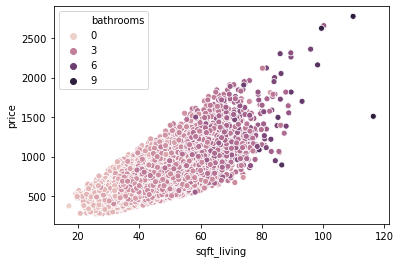

In [61]:
sns.scatterplot('sqft_living','price',data=df,hue='bathrooms')

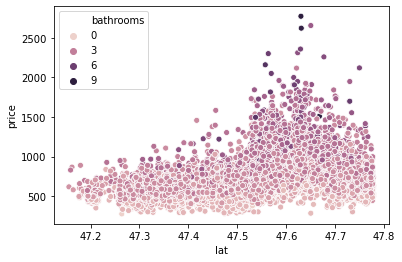

In [62]:
sns.scatterplot('lat','price',data=df,hue='bathrooms')

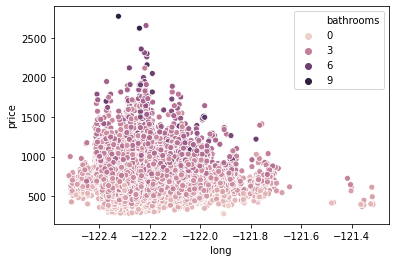

In [64]:
sns.scatterplot('long','price',data=df,hue='bathrooms')

In [65]:
target=df.price

In [66]:
df=df.drop(['price','waterfront'],axis=1)

# Training the Model

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [70]:
steps=[('Scaler',StandardScaler()),('Ridge',Ridge())]


In [71]:
pipeline=Pipeline(steps)

In [72]:
parameters={'Ridge__alpha':np.logspace(0,4,20)}

In [73]:
cv=GridSearchCV(pipeline,parameters,cv=3)

In [74]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('Scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'Ridge__alpha': array([1.0...5090e+00, 4.28133240e+00,
       6.95192796e+00, 1.12883789e+01, 1.83298071e+01, 2.97635144e+01,
       4.83293

In [75]:
y_pred_train=cv.predict(X_train)

In [76]:
y_pred_test=cv.predict(X_test)

# Predictions

In [77]:
np.sqrt(mean_squared_error(y_pred_train,Y_train))

100.77842224603549

In [78]:
np.sqrt(mean_squared_error(y_pred_test,Y_test))

100.08351835921647

Since, the test error is quite small we can conclude that this model was a good fit on the data.